In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore') 

In [36]:
data = pd.read_csv('../parkinsons_disease_data.csv')
data = data[["Age", "UPDRS", "MoCA", "FunctionalAssessment", "Diagnosis"]]

In [37]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2105 non-null   int64  
 1   UPDRS                 2105 non-null   float64
 2   MoCA                  2105 non-null   float64
 3   FunctionalAssessment  2105 non-null   float64
 4   Diagnosis             2105 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 82.4 KB


None

In [38]:
data.head(4).T

,0,1,2,3
Age,85.000000,75.000000,70.000000,52.000000
UPDRS,6.458713,37.306703,67.838170,52.964696
MoCA,29.181289,12.332639,29.927783,21.304268
FunctionalAssessment,1.572427,4.787551,2.130686,3.391288
Diagnosis,0.000000,1.000000,1.000000,1.000000


In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2105.0,69.601900,11.594511,50.000000,60.000000,70.000000,80.000000,89.000000
UPDRS,2105.0,101.415318,56.591448,0.028441,53.048148,102.561023,149.831682,198.953604
MoCA,2105.0,15.094314,8.643014,0.021191,7.517160,14.963574,22.608362,29.970107
FunctionalAssessment,2105.0,4.989694,2.933877,0.001505,2.415890,4.983227,7.484220,9.992697
Diagnosis,2105.0,0.619477,0.485631,0.000000,0.000000,1.000000,1.000000,1.000000


In [40]:
P = data[(data['Diagnosis'] != 0)]
H = data[(data['Diagnosis'] == 0)]

def target_count():
    trace = go.Bar( x = data['Diagnosis'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Diagnosis'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Diagnosis variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

def target_percent():
    trace = go.Pie(labels = ['healthy','parkinson'], values = data['Diagnosis'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Diagnosis variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [41]:
target_count()
target_percent()

In [42]:
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

missing_plot(data, 'Diagnosis')

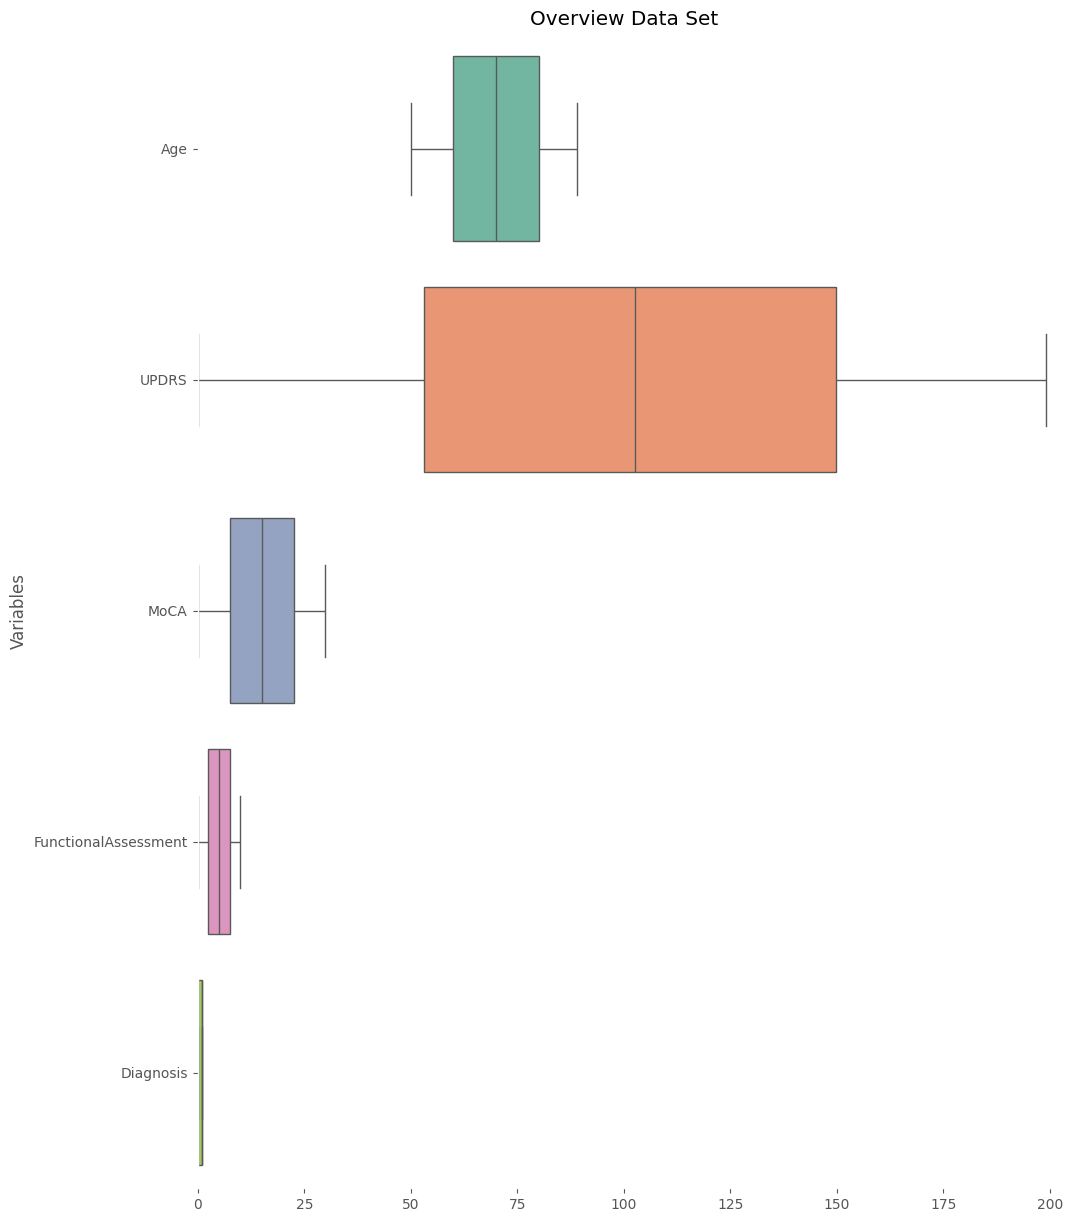

In [43]:
plt.style.use('ggplot')

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor("#ffffff")
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

In [44]:
def correlation_plot():
    correlation = data.corr()
    matrix_cols = correlation.columns.tolist()
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

correlation_plot()